In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', 50)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import NuSVC

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df = pd.read_csv('datasets_156197_358170_Churn_Modelling.csv')
data = df.copy()
data_raw = data.copy()
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Balancing my data:

In [4]:
df1 = df.loc[(df.Exited == 0)]
df1.shape

(7963, 11)

In [5]:
df2 = df.loc[(df.Exited == 1)]
df2.shape

(2037, 11)

In [6]:
df1 = df1.iloc[:-2000]
df1.shape

(5963, 11)

In [7]:
frames = [df1, df2]
df = pd.concat(frames)
df.Exited.value_counts()

0    5963
1    2037
Name: Exited, dtype: int64

In [8]:
from sklearn.utils import shuffle
df = shuffle(df).reset_index(drop=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,448,Spain,Male,25,2,0.00,2,0,0,95215.73,0
1,682,France,Male,37,5,0.00,2,0,1,112554.68,0
2,549,Germany,Female,43,3,134985.66,1,1,0,6101.41,0
3,443,Germany,Male,59,4,110939.30,1,1,0,72846.58,1
4,575,Spain,Female,37,9,133292.45,1,1,0,111175.09,0


# Feature Selection:

In [9]:
# Dummies:

dummies_geo = df.Geography.str.get_dummies()
dummies_gen = df.Gender.str.get_dummies()

df = pd.concat([df, dummies_gen, dummies_geo], axis=1, sort=False)

df.drop(columns=['Geography', 'Gender'], inplace=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,448,25,2,0.00,2,0,0,95215.73,0,0,1,0,0,1
1,682,37,5,0.00,2,0,1,112554.68,0,0,1,1,0,0
2,549,43,3,134985.66,1,1,0,6101.41,0,1,0,0,1,0
3,443,59,4,110939.30,1,1,0,72846.58,1,0,1,0,1,0
4,575,37,9,133292.45,1,1,0,111175.09,0,1,0,0,0,1


In [10]:
# RFE:

from sklearn.feature_selection import RFE

y = df.Exited
df1 = df.drop(columns=['Exited'])


estimator = LogisticRegression()
selector = RFE(estimator, 4)
selector = selector.fit(df1,y)

df1.columns[selector.support_]

C:\Users\Kasia\anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\Kasia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Kasia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

Index(['IsActiveMember', 'Female', 'France', 'Germany'], dtype='object')

In [11]:
df_wobestfeatures = df.drop(columns=['IsActiveMember', 'Female', 'France', 'Germany'])
df_wobestfeatures

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited,Male,Spain
0,448,25,2,0.00,2,0,95215.73,0,1,1
1,682,37,5,0.00,2,0,112554.68,0,1,0
2,549,43,3,134985.66,1,1,6101.41,0,0,0
3,443,59,4,110939.30,1,1,72846.58,1,1,0
4,575,37,9,133292.45,1,1,111175.09,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7995,672,40,10,102980.44,1,1,1285.81,1,1,0
7996,534,23,5,104822.45,1,0,160176.47,0,0,0
7997,850,47,6,0.00,1,1,187391.02,1,1,0
7998,577,48,6,179852.26,1,1,193580.32,0,1,1


# Scaling:

In [12]:
scaler = StandardScaler()
df_wobestfeatures_scaled = scaler.fit_transform(df_wobestfeatures)
df_wobestfeatures_scaled

array([[-2.08104936e+00, -1.35411481e+00, -1.03924064e+00, ...,
        -5.84471192e-01,  9.28779288e-01,  1.75072575e+00],
       [ 3.32474518e-01, -2.14197574e-01,  1.21386359e-03, ...,
        -5.84471192e-01,  9.28779288e-01, -5.71191690e-01],
       [-1.03931469e+00,  3.55761046e-01, -6.92422472e-01, ...,
        -5.84471192e-01, -1.07668206e+00, -5.71191690e-01],
       ...,
       [ 2.06526089e+00,  7.35733459e-01,  3.48032031e-01, ...,
         1.71094831e+00,  9.28779288e-01, -5.71191690e-01],
       [-7.50516966e-01,  8.30726563e-01,  3.48032031e-01, ...,
        -5.84471192e-01,  9.28779288e-01,  1.75072575e+00],
       [ 1.31232395e+00, -4.04183781e-01, -6.92422472e-01, ...,
        -5.84471192e-01, -1.07668206e+00,  1.75072575e+00]])

# Clustering with PCA and Elbow:

In [13]:
# PCA

pca=PCA(0.85)
pca.fit(df_wobestfeatures_scaled)
X_pca=pd.DataFrame(pca.transform(df_wobestfeatures_scaled), columns=['PC1','PC2','PC3', 'PC4','PC5','PC6', 'PC7', 'PC8'])
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-2.237761,0.411293,1.683775,0.177892,2.438759,0.920548,0.553137,0.347464
1,-1.314738,0.263790,0.795406,-0.485720,-0.283012,0.131511,0.320661,1.727347
2,0.937395,-0.650135,-0.143736,0.588295,1.185171,-1.617776,0.671266,-1.017066
3,2.467648,0.532904,-0.917130,1.118200,2.145695,0.190245,-0.301147,0.848748
4,0.062896,-0.446864,-0.603704,0.519008,0.157682,1.432183,0.981495,-2.150817
...,...,...,...,...,...,...,...,...
7995,1.367291,-0.439616,-1.503391,1.871168,-0.672572,-0.334277,0.980358,0.613645
7996,-0.058680,-1.168156,0.762525,-2.075588,0.921892,0.487786,1.467192,-0.571034
7997,0.943847,0.586071,-0.579212,-0.061997,-1.924978,0.834613,-1.817865,0.669686
7998,0.716963,-0.981299,-0.152823,0.489323,0.637464,2.582213,-0.999371,-0.702836


C:\Users\Kasia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Kasia\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002796F810788>,
                 k=None, model=None, timings=False)

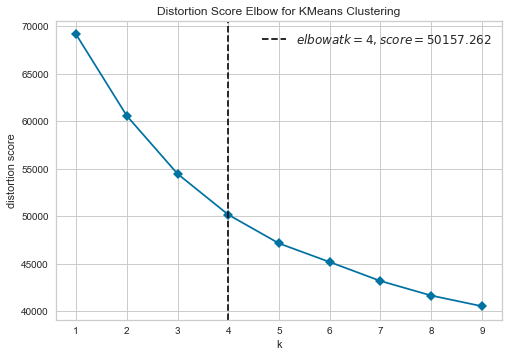

In [14]:
# Elbow:

from yellowbrick.cluster.elbow import kelbow_visualizer

kelbow_visualizer(KMeans(random_state=4), X_pca, k=(1,10),timings=False)


In [15]:
# KMeans

kmeans=KMeans(4)
kmeans=kmeans.fit(X_pca)
df_wobestfeatures['Cluster']=kmeans.predict(X_pca)

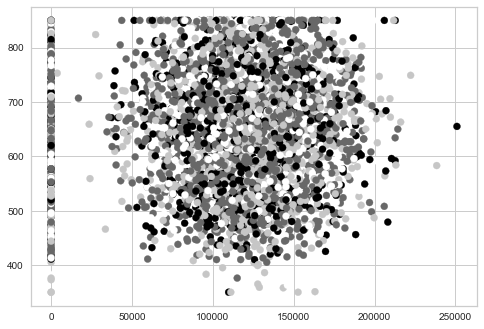

In [16]:
plt.scatter(df_wobestfeatures['Balance'],df_wobestfeatures['CreditScore'],c=df_wobestfeatures['Cluster'])
plt.show()

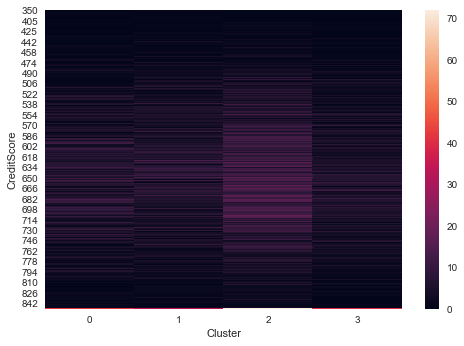

In [17]:
sns.heatmap(pd.crosstab(df_wobestfeatures.CreditScore,df_wobestfeatures.Cluster))

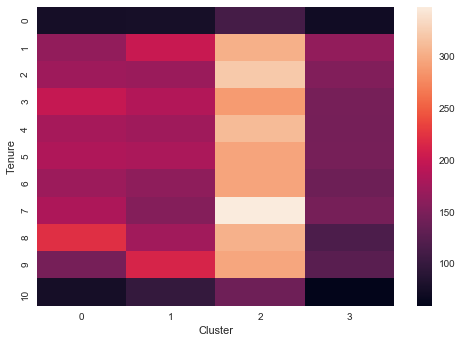

In [18]:
sns.heatmap(pd.crosstab(df_wobestfeatures.Tenure,df_wobestfeatures.Cluster))

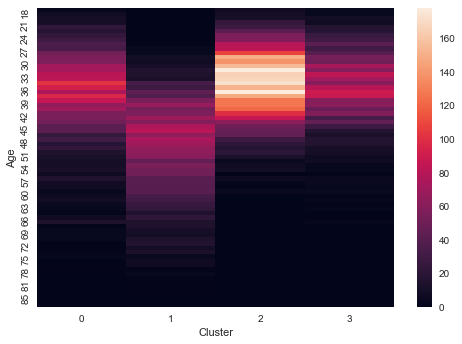

In [19]:
sns.heatmap(pd.crosstab(df_wobestfeatures.Age,df_wobestfeatures.Cluster))

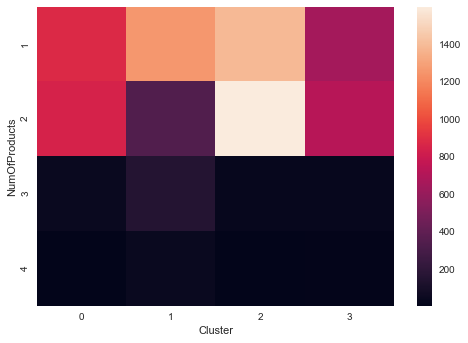

In [20]:
sns.heatmap(pd.crosstab(df_wobestfeatures.NumOfProducts,df_wobestfeatures.Cluster))

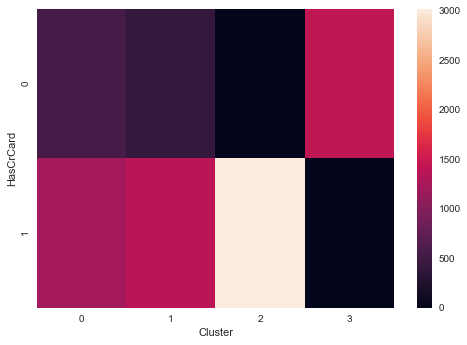

In [21]:
sns.heatmap(pd.crosstab(df_wobestfeatures.HasCrCard,df_wobestfeatures.Cluster))

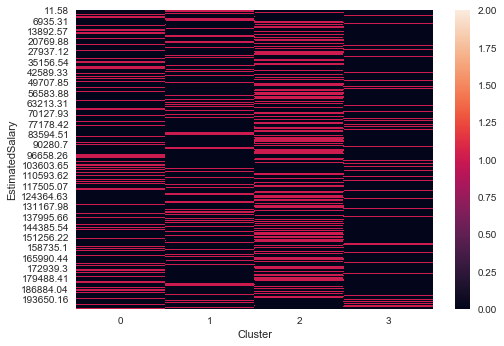

In [22]:
sns.heatmap(pd.crosstab(df_wobestfeatures.EstimatedSalary,df_wobestfeatures.Cluster))

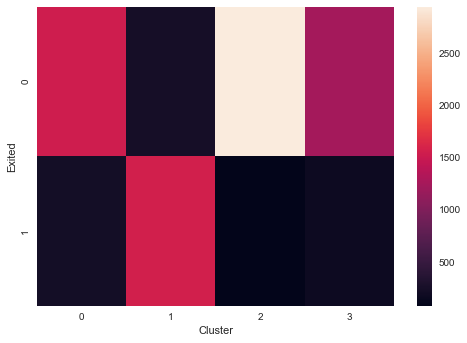

In [23]:
sns.heatmap(pd.crosstab(df_wobestfeatures.Exited,df_wobestfeatures.Cluster))

In [61]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

print('Model 1. Silhouette score is',silhouette_score(X_pca,kmeans.labels_))
print('Model 1. Davies Bouldin score is',davies_bouldin_score(X_pca,kmeans.labels_))

Model 1. Silhouette score is 0.13969604002933564
Model 1. Davies Bouldin score is 2.0591587025053353


In [24]:
#sns.heatmap(pd.crosstab(df_wobestfeatures.Female,df_wobestfeatures.Cluster))

In [25]:
#sns.heatmap(pd.crosstab(df_wobestfeatures.Germany,df_wobestfeatures.Cluster))

In [26]:
# KMeans (I will try with 2 clusters)

#kmeans=KMeans(2)
#kmeans=kmeans.fit(X_pca)
#df_wobestfeatures['Cluster2']=kmeans.predict(X_pca)

In [27]:
#plt.scatter(df_wobestfeatures['Balance'],df_wobestfeatures['CreditScore'],c=df_wobestfeatures['Cluster2'])
#plt.show()

In [28]:
#sns.heatmap(pd.crosstab(df_wobestfeatures.Tenure,df_wobestfeatures.Cluster2))

In [29]:
#sns.heatmap(pd.crosstab(df_wobestfeatures.Age,df_wobestfeatures.Cluster2))

In [30]:
#sns.heatmap(pd.crosstab(df_wobestfeatures.NumOfProducts,df_wobestfeatures.Cluster2))

In [31]:
# Concating Cluster with previously selected important features and y

df2 = pd.concat([df_wobestfeatures.Cluster, df.IsActiveMember, df.Female, df.France, df.Germany, df.Exited], axis=1, sort=False)
dummies_clust = pd.get_dummies(df2.Cluster)

df2 = pd.concat([df2, dummies_clust], axis=1, sort=False)
df2 = df2.drop(columns=["Cluster"])
df2

,IsActiveMember,Female,France,Germany,Exited,0,1,2,3
0,0,0,0,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0,1
2,0,1,0,1,0,0,0,1,0
3,0,0,0,1,1,0,1,0,0
4,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
7995,0,0,0,1,1,0,1,0,0
7996,1,1,1,0,0,0,0,0,1
7997,0,0,1,0,1,0,1,0,0
7998,0,0,0,0,0,1,0,0,0


# Clasyfication models:

In [32]:
# Over & undersampling:

In [33]:
#df3 = df2.loc[(df2.Exited == 0)]
#df3.shape


In [34]:
#df4 = df2.loc[(df2.Exited == 1)]
#df4.shape

In [35]:
#df3 = df3.iloc[:-2000]
#df3.shape

In [36]:
#frames = [df3, df4]
#result = pd.concat(frames)
#result.shape
#result.Exited.value_counts()

In [37]:
#y = result["Exited"]
#X = result.drop(["Exited"],axis = 1)  

In [38]:
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler

#y = df2["Exited"]
#X = df2.drop(["Exited"],axis = 1)

#oversample = SMOTE(sampling_strategy=0.40)
#X, y = oversample.fit_resample(X, y)

#undersample = RandomUnderSampler(sampling_strategy=0.45)
#X, y = undersample.fit_resample(X, y)

#y.value_counts(normalize=True).round(2)

In [39]:
# Splitting data for train and test:

y = df2["Exited"]
X = df2.drop(["Exited"],axis = 1)

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=1/3, random_state=14)

In [40]:
model1=LogisticRegression(max_iter=1e8, random_state=11).fit(X_train,y_train)
y_pred1=model1.predict(X_test)

conf1=confusion_matrix(y_test,y_pred1)
display(conf1)

acc1=accuracy_score(y_test,y_pred1).round(3)
rec1=recall_score(y_test,y_pred1).round(3)
pr1=precision_score(y_test,y_pred1).round(3)
f11=f1_score(y_test,y_pred1).round(3)
print(acc1,pr1,rec1,f11)

array([[1912,   86],
       [ 154,  515]], dtype=int64)

0.91 0.857 0.77 0.811


In [41]:
#model1.coef_

In [42]:
#model3.feature_importances_

In [43]:
#confusion_matrix(y_train,model1.predict(X_train))

In [44]:
model2=KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)
y_pred2=model2.predict(X_test)

conf2=confusion_matrix(y_test,y_pred2)
display(conf2)

acc2=accuracy_score(y_test,y_pred2).round(3)
rec2=recall_score(y_test,y_pred2).round(3)
pr2=precision_score(y_test,y_pred2).round(3)
f12=f1_score(y_test,y_pred2).round(3)
print(acc2,pr2,rec2,f12)

array([[1912,   86],
       [ 155,  514]], dtype=int64)

0.91 0.857 0.768 0.81


In [45]:
confusion_matrix(y_train,model1.predict(X_train))

array([[3811,  154],
       [ 322, 1046]], dtype=int64)

In [46]:
model3 = XGBClassifier(random_state=11).fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

conf3 = confusion_matrix(y_test,y_pred3)
display(conf3)

acc3 = accuracy_score(y_test,y_pred3).round(3)
rec3 = recall_score(y_test,y_pred3).round(3)
pr3 = precision_score(y_test,y_pred3).round(3)
f13=f1_score(y_test,y_pred3).round(3)

print(acc3,pr3,rec3,f13)

array([[1912,   86],
       [ 152,  517]], dtype=int64)

0.911 0.857 0.773 0.813


In [47]:
model4 = CatBoostClassifier().fit(X_train,y_train)
y_pred4 = model4.predict(X_test)

conf4 = confusion_matrix(y_test,y_pred4)
display(conf4)

acc4 = accuracy_score(y_test,y_pred4).round(3)
rec4 = recall_score(y_test,y_pred4).round(3)
pr4 = precision_score(y_test,y_pred4).round(3).round(3)
f14 = f1_score(y_test,y_pred4).round(3)

print(acc4,pr4,rec4,f14)

Learning rate set to 0.026906
0:	learn: 0.6627644	total: 73.3ms	remaining: 1m 13s
1:	learn: 0.6320500	total: 78.1ms	remaining: 39s
2:	learn: 0.6102056	total: 81.7ms	remaining: 27.2s
3:	learn: 0.5890210	total: 86.7ms	remaining: 21.6s
4:	learn: 0.5699780	total: 92.6ms	remaining: 18.4s
5:	learn: 0.5455574	total: 98.7ms	remaining: 16.3s
6:	learn: 0.5262796	total: 107ms	remaining: 15.2s
7:	learn: 0.5077753	total: 114ms	remaining: 14.1s
8:	learn: 0.4923389	total: 121ms	remaining: 13.4s
9:	learn: 0.4768664	total: 126ms	remaining: 12.5s
10:	learn: 0.4601446	total: 131ms	remaining: 11.8s
11:	learn: 0.4470046	total: 135ms	remaining: 11.1s
12:	learn: 0.4365333	total: 139ms	remaining: 10.6s
13:	learn: 0.4259380	total: 143ms	remaining: 10s
14:	learn: 0.4128937	total: 151ms	remaining: 9.9s
15:	learn: 0.4038433	total: 154ms	remaining: 9.47s
16:	learn: 0.3938352	total: 158ms	remaining: 9.16s
17:	learn: 0.3853040	total: 164ms	remaining: 8.93s
18:	learn: 0.3767215	total: 170ms	remaining: 8.76s
19:	learn

186:	learn: 0.2522407	total: 1.02s	remaining: 4.42s
187:	learn: 0.2522229	total: 1.02s	remaining: 4.42s
188:	learn: 0.2522186	total: 1.03s	remaining: 4.42s
189:	learn: 0.2522160	total: 1.03s	remaining: 4.41s
190:	learn: 0.2522145	total: 1.04s	remaining: 4.39s
191:	learn: 0.2522135	total: 1.04s	remaining: 4.38s
192:	learn: 0.2522109	total: 1.05s	remaining: 4.37s
193:	learn: 0.2522074	total: 1.05s	remaining: 4.37s
194:	learn: 0.2522033	total: 1.06s	remaining: 4.37s
195:	learn: 0.2521983	total: 1.06s	remaining: 4.37s
196:	learn: 0.2521895	total: 1.07s	remaining: 4.37s
197:	learn: 0.2521828	total: 1.07s	remaining: 4.36s
198:	learn: 0.2521788	total: 1.08s	remaining: 4.36s
199:	learn: 0.2521707	total: 1.09s	remaining: 4.35s
200:	learn: 0.2521561	total: 1.09s	remaining: 4.34s
201:	learn: 0.2521553	total: 1.09s	remaining: 4.33s
202:	learn: 0.2521493	total: 1.1s	remaining: 4.32s
203:	learn: 0.2521470	total: 1.1s	remaining: 4.3s
204:	learn: 0.2521385	total: 1.11s	remaining: 4.3s
205:	learn: 0.25

346:	learn: 0.2518330	total: 1.86s	remaining: 3.51s
347:	learn: 0.2518314	total: 1.87s	remaining: 3.5s
348:	learn: 0.2518288	total: 1.88s	remaining: 3.5s
349:	learn: 0.2518272	total: 1.88s	remaining: 3.5s
350:	learn: 0.2518272	total: 1.89s	remaining: 3.49s
351:	learn: 0.2518272	total: 1.9s	remaining: 3.49s
352:	learn: 0.2518255	total: 1.9s	remaining: 3.48s
353:	learn: 0.2518254	total: 1.91s	remaining: 3.48s
354:	learn: 0.2518231	total: 1.91s	remaining: 3.47s
355:	learn: 0.2518217	total: 1.92s	remaining: 3.47s
356:	learn: 0.2518210	total: 1.92s	remaining: 3.46s
357:	learn: 0.2518210	total: 1.93s	remaining: 3.46s
358:	learn: 0.2518194	total: 1.94s	remaining: 3.46s
359:	learn: 0.2518183	total: 1.94s	remaining: 3.45s
360:	learn: 0.2518172	total: 1.95s	remaining: 3.44s
361:	learn: 0.2518172	total: 1.95s	remaining: 3.43s
362:	learn: 0.2518172	total: 1.95s	remaining: 3.43s
363:	learn: 0.2518172	total: 1.96s	remaining: 3.42s
364:	learn: 0.2518172	total: 1.96s	remaining: 3.42s
365:	learn: 0.251

511:	learn: 0.2517562	total: 3.09s	remaining: 2.94s
512:	learn: 0.2517562	total: 3.09s	remaining: 2.93s
513:	learn: 0.2517562	total: 3.1s	remaining: 2.93s
514:	learn: 0.2517562	total: 3.1s	remaining: 2.92s
515:	learn: 0.2517560	total: 3.11s	remaining: 2.92s
516:	learn: 0.2517560	total: 3.12s	remaining: 2.91s
517:	learn: 0.2517560	total: 3.12s	remaining: 2.91s
518:	learn: 0.2517560	total: 3.13s	remaining: 2.9s
519:	learn: 0.2517560	total: 3.14s	remaining: 2.9s
520:	learn: 0.2517560	total: 3.14s	remaining: 2.89s
521:	learn: 0.2517560	total: 3.16s	remaining: 2.9s
522:	learn: 0.2517557	total: 3.17s	remaining: 2.89s
523:	learn: 0.2517557	total: 3.17s	remaining: 2.88s
524:	learn: 0.2517557	total: 3.18s	remaining: 2.88s
525:	learn: 0.2517557	total: 3.18s	remaining: 2.87s
526:	learn: 0.2517557	total: 3.19s	remaining: 2.87s
527:	learn: 0.2517557	total: 3.21s	remaining: 2.87s
528:	learn: 0.2517557	total: 3.21s	remaining: 2.86s
529:	learn: 0.2517557	total: 3.22s	remaining: 2.85s
530:	learn: 0.251

700:	learn: 0.2517539	total: 4.1s	remaining: 1.75s
701:	learn: 0.2517539	total: 4.11s	remaining: 1.74s
702:	learn: 0.2517539	total: 4.11s	remaining: 1.74s
703:	learn: 0.2517539	total: 4.12s	remaining: 1.73s
704:	learn: 0.2517539	total: 4.12s	remaining: 1.72s
705:	learn: 0.2517539	total: 4.13s	remaining: 1.72s
706:	learn: 0.2517539	total: 4.13s	remaining: 1.71s
707:	learn: 0.2517539	total: 4.13s	remaining: 1.71s
708:	learn: 0.2517539	total: 4.14s	remaining: 1.7s
709:	learn: 0.2517539	total: 4.14s	remaining: 1.69s
710:	learn: 0.2517539	total: 4.14s	remaining: 1.68s
711:	learn: 0.2517539	total: 4.15s	remaining: 1.68s
712:	learn: 0.2517539	total: 4.15s	remaining: 1.67s
713:	learn: 0.2517539	total: 4.16s	remaining: 1.67s
714:	learn: 0.2517539	total: 4.16s	remaining: 1.66s
715:	learn: 0.2517539	total: 4.17s	remaining: 1.65s
716:	learn: 0.2517539	total: 4.17s	remaining: 1.65s
717:	learn: 0.2517539	total: 4.17s	remaining: 1.64s
718:	learn: 0.2517539	total: 4.18s	remaining: 1.63s
719:	learn: 0.

888:	learn: 0.2517539	total: 4.95s	remaining: 618ms
889:	learn: 0.2517539	total: 4.96s	remaining: 613ms
890:	learn: 0.2517539	total: 4.96s	remaining: 607ms
891:	learn: 0.2517539	total: 4.97s	remaining: 602ms
892:	learn: 0.2517539	total: 4.97s	remaining: 596ms
893:	learn: 0.2517539	total: 4.98s	remaining: 591ms
894:	learn: 0.2517539	total: 4.99s	remaining: 585ms
895:	learn: 0.2517539	total: 4.99s	remaining: 580ms
896:	learn: 0.2517539	total: 5s	remaining: 574ms
897:	learn: 0.2517539	total: 5s	remaining: 568ms
898:	learn: 0.2517539	total: 5.01s	remaining: 563ms
899:	learn: 0.2517539	total: 5.01s	remaining: 557ms
900:	learn: 0.2517539	total: 5.02s	remaining: 552ms
901:	learn: 0.2517539	total: 5.02s	remaining: 546ms
902:	learn: 0.2517539	total: 5.03s	remaining: 540ms
903:	learn: 0.2517539	total: 5.03s	remaining: 535ms
904:	learn: 0.2517539	total: 5.04s	remaining: 529ms
905:	learn: 0.2517539	total: 5.04s	remaining: 523ms
906:	learn: 0.2517539	total: 5.05s	remaining: 518ms
907:	learn: 0.2517

array([[1912,   86],
       [ 153,  516]], dtype=int64)

0.91 0.857 0.771 0.812


In [48]:
model5 = AdaBoostClassifier().fit(X_train,y_train)
y_pred5 = model5.predict(X_test)

conf5 = confusion_matrix(y_test,y_pred5)
display(conf5)

acc5=accuracy_score(y_test,y_pred5)
rec5=recall_score(y_test,y_pred5)
pr5=precision_score(y_test,y_pred5)
f15=f1_score(y_test,y_pred5)
print(acc5,pr5,rec5,f15)

array([[1914,   84],
       [ 155,  514]], dtype=int64)

0.9103862017247843 0.8595317725752508 0.7683109118086696 0.8113654301499604


In [49]:
model6 = DecisionTreeClassifier().fit(X_train,y_train)
y_pred6 = model6.predict(X_test)

conf6 = confusion_matrix(y_test,y_pred6)
display(conf6)

acc6=accuracy_score(y_test,y_pred6)
rec6=recall_score(y_test,y_pred6)
pr6=precision_score(y_test,y_pred6)
f16=f1_score(y_test,y_pred6)
print(acc6,pr6,rec6,f16)

array([[1912,   86],
       [ 155,  514]], dtype=int64)

0.9096362954630671 0.8566666666666667 0.7683109118086696 0.8100866824271079


In [50]:
model7 = RandomForestClassifier().fit(X_train,y_train)
y_pred7 = model7.predict(X_test)

conf7 = confusion_matrix(y_test,y_pred7)
display(conf7)

acc7=accuracy_score(y_test,y_pred7)
rec7=recall_score(y_test,y_pred7)
pr7=precision_score(y_test,y_pred7)
f17=f1_score(y_test,y_pred7)
print(acc7,pr7,rec7,f17)

array([[1912,   86],
       [ 155,  514]], dtype=int64)

0.9096362954630671 0.8566666666666667 0.7683109118086696 0.8100866824271079


In [51]:
model8 = RandomForestClassifier(class_weight='balanced').fit(X_train,y_train)
y_pred8 = model8.predict(X_test)

conf8 = confusion_matrix(y_test,y_pred8)
display(conf8)

acc8=accuracy_score(y_test,y_pred8).round(3)
rec8=recall_score(y_test,y_pred8).round(3)
pr8=precision_score(y_test,y_pred8).round(3)
f18=f1_score(y_test,y_pred8).round(3)
print(acc8,pr8,rec8,f18)

array([[1881,  117],
       [ 144,  525]], dtype=int64)

0.902 0.818 0.785 0.801


In [52]:
model9 = GaussianNB().fit(X_train,y_train)
y_pred9=model9.predict(X_test)

conf9 = confusion_matrix(y_test,y_pred9)
display(conf9)

acc9=accuracy_score(y_test,y_pred9).round(3)
rec9=recall_score(y_test,y_pred9).round(3)
pr9=precision_score(y_test,y_pred9).round(3)
f19=f1_score(y_test,y_pred9).round(3)
print(acc9,pr9,rec9,f19)

array([[1914,   84],
       [ 155,  514]], dtype=int64)

0.91 0.86 0.768 0.811


In [53]:
model10 = NuSVC(nu=0.1).fit(X_train,y_train)
y_pred10 = model10.predict(X_test)

conf10 = confusion_matrix(y_test,y_pred10)
display(conf10)

acc10=accuracy_score(y_test,y_pred10).round(3)
rec10=recall_score(y_test,y_pred10).round(3)
pr10=precision_score(y_test,y_pred10).round(3)
f110=f1_score(y_test,y_pred10).round(3)
print(acc10,pr10,rec10,f110)

array([[ 856, 1142],
       [ 111,  558]], dtype=int64)

0.53 0.328 0.834 0.471


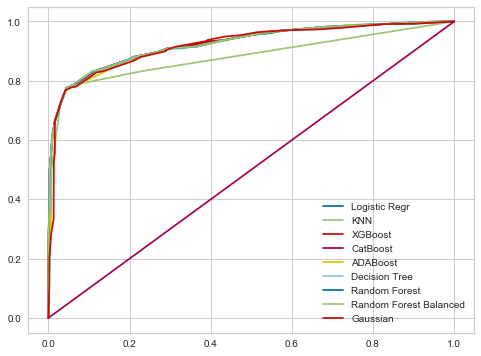

In [54]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

model_roc1=roc_auc_score(y_test, y_pred1)
model_roc2=roc_auc_score(y_test, y_pred2)
model_roc3=roc_auc_score(y_test, y_pred3)
model_roc4=roc_auc_score(y_test, y_pred4)
model_roc5=roc_auc_score(y_test, y_pred5)
model_roc6=roc_auc_score(y_test, y_pred6)
model_roc7=roc_auc_score(y_test, y_pred7)
model_roc8=roc_auc_score(y_test, y_pred8)
model_roc9=roc_auc_score(y_test, y_pred9)
model_roc10=roc_auc_score(y_test, y_pred10)


fpr1,tpr1,thresholds1=roc_curve(y_test, model1.predict_proba(X_test)[:,1])
fpr2,tpr2,thresholds1=roc_curve(y_test, model2.predict_proba(X_test)[:,1])
fpr3,tpr3,thresholds1=roc_curve(y_test, model3.predict_proba(X_test)[:,1])
fpr4,tpr4,thresholds1=roc_curve(y_test, model4.predict_proba(X_test)[:,1])
fpr5,tpr5,thresholds1=roc_curve(y_test, model5.predict_proba(X_test)[:,1])
fpr6,tpr6,thresholds1=roc_curve(y_test, model6.predict_proba(X_test)[:,1])
fpr7,tpr7,thresholds1=roc_curve(y_test, model7.predict_proba(X_test)[:,1])
fpr8,tpr8,thresholds1=roc_curve(y_test, model8.predict_proba(X_test)[:,1])
fpr9,tpr9,thresholds1=roc_curve(y_test, model9.predict_proba(X_test)[:,1])
#fpr10,tp101,thresholds1=roc_curve(y_test, model10.predict_proba(X_test)[:,1])



plt.figure(figsize=(8,6))
plt.plot(fpr1,tpr1, label=f'Logistic Regr')
plt.plot(fpr2,tpr2, label=f'KNN')
plt.plot(fpr3,tpr3, label=f'XGBoost')
plt.plot(fpr4,tpr4, label=f'CatBoost')
plt.plot(fpr5,tpr5, label=f'ADABoost')
plt.plot(fpr6,tpr6, label=f'Decision Tree')
plt.plot(fpr7,tpr7, label=f'Random Forest')
plt.plot(fpr8,tpr8, label=f'Random Forest Balanced')
plt.plot(fpr9,tpr9, label=f'Gaussian')
#plt.plot(fpr10,tpr10, label=f'NuSVC')



plt.plot([0,1],[0,1])
plt.legend()
plt.show()

In [55]:
models = [('Logistic Regression', acc1, rec1, pr1, f11, model_roc1),
          ('K-Nearest Neighbors',acc2, rec2, pr2, f12, model_roc2),
          ('XGBoost', acc3, rec3, pr3, f13, model_roc3),
          ('CatBoost', acc4, rec4, pr4, f14, model_roc4),
          ('ADABoost', acc5, rec5, pr5, f15, model_roc5),
          ('Decision Tree', acc6, rec6, pr6, f16, model_roc6),
          ('Random Forest Classifier', acc7, rec7, pr7, f17, model_roc7),
          ('Random Forest Balanced', acc8, rec8, pr8, f18, model_roc8),
          ('Gaussian', acc9, rec9, pr9, f19, model_roc9),
          ('NuSVC', acc10, rec10, pr10, f110, model_roc10)]
           
           
           
models_results = pd.DataFrame(data = models, columns=['Model', 'ACC', 'REC', 'PR', 'F1', 'ROC'])
models_results

,Model,ACC,REC,PR,F1,ROC
0,Logistic Regression,0.910000,0.770000,0.857000,0.811000,0.863381
1,K-Nearest Neighbors,0.910000,0.768000,0.857000,0.810000,0.862634
2,XGBoost,0.911000,0.773000,0.857000,0.813000,0.864876
3,CatBoost,0.910000,0.771000,0.857000,0.812000,0.864129
4,ADABoost,0.910386,0.768311,0.859532,0.811365,0.863134
5,Decision Tree,0.909636,0.768311,0.856667,0.810087,0.862634
6,Random Forest Classifier,0.909636,0.768311,0.856667,0.810087,0.862634
7,Random Forest Balanced,0.902000,0.785000,0.818000,0.801000,0.863097
8,Gaussian,0.910000,0.768000,0.860000,0.811000,0.863134
9,NuSVC,0.530000,0.834000,0.328000,0.471000,0.631255
